In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch

In [28]:
lsoa_supply = pd.read_csv("Data/lsoa_supply.csv")
lsoa_demand = gpd.read_file("Data/lsoa_demand.shp")
lsoa = gpd.read_file("Data/manchester_lsoa/manchester_lsoa.shp")
lsoa_outline = gpd.read_file("Data/manchester_lsoa/manchester_outline.shp")

### Trial

In [3]:
msoa_demand

,Unnamed: 0,msoa21cd,msoa21nm,pop_density,Elderly Percentage,Children Percentage,Total annual income,Disabled-No Car Household
0,0,E02001012,Bolton 029,5664.563014,11.781521,26.135784,38400.0,286
1,1,E02001160,Salford 004,2837.953609,13.516468,24.695914,37400.0,447
2,2,E02001158,Salford 002,5019.012057,16.031038,20.554730,31300.0,538
3,3,E02001161,Salford 005,2291.129449,20.191978,15.015427,39600.0,337
4,4,E02000988,Bolton 005,4637.129306,16.034921,19.714886,35300.0,514
...,...,...,...,...,...,...,...,...
348,348,E02001296,Wigan 010,2664.952812,12.270210,25.459579,29800.0,812
349,349,E02001319,Wigan 033,1838.090531,16.103021,18.076784,34900.0,425
350,350,E02001316,Wigan 030,6238.046581,12.157604,18.378087,32600.0,544
351,351,E02001324,Wigan 038,2958.331323,18.968206,18.044391,35900.0,374


In [4]:
msoa_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 353 non-null    int64  
 1   msoa21cd                   353 non-null    object 
 2   msoa21nm                   353 non-null    object 
 3   pop_density                353 non-null    float64
 4   Elderly Percentage         353 non-null    float64
 5   Children Percentage        353 non-null    float64
 6   Total annual income        340 non-null    float64
 7   Disabled-No Car Household  353 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.2+ KB


In [5]:
msoa_demand["pop_density_norm"] = msoa_demand["pop_density"] / msoa_demand["pop_density"].max()
msoa_demand.pop_density_norm

print(msoa_demand.pop_density_norm.max())
print(msoa_demand.pop_density_norm.min())

1.0
0.011379441768099642


In [6]:
msoa_demand["Elderly Percentage_norm"] = msoa_demand["Elderly Percentage"] / msoa_demand["Elderly Percentage"].max()
msoa_demand["Elderly Percentage_norm"]

print(msoa_demand["Elderly Percentage_norm"].max())
print(msoa_demand["Elderly Percentage_norm"].min())

1.0
0.024625625994595043


In [7]:
msoa_demand["Children Percentage_norm"] = msoa_demand["Children Percentage"] / msoa_demand["Children Percentage"].max()
msoa_demand["Children Percentage_norm"]

print(msoa_demand["Children Percentage_norm"].max())
print(msoa_demand["Children Percentage_norm"].min())

1.0
0.019128043237460403


In [8]:
msoa_demand["Total annual income_norm"] = msoa_demand["Total annual income"] / msoa_demand["Total annual income"].max()
msoa_demand["Total annual income_norm"]

print(msoa_demand["Total annual income_norm"].max())
print(msoa_demand["Total annual income_norm"].min())

1.0
0.39344262295081966


In [9]:
msoa_demand["Disabled-No Car Household_norm"] = msoa_demand["Disabled-No Car Household"] / msoa_demand["Disabled-No Car Household"].max()
msoa_demand["Disabled-No Car Household_norm"]

print(msoa_demand["Disabled-No Car Household_norm"].max())
print(msoa_demand["Disabled-No Car Household_norm"].min())

1.0
0.06962576153176675


In [10]:
msoa_demand

,Unnamed: 0,msoa21cd,msoa21nm,pop_density,Elderly Percentage,Children Percentage,Total annual income,Disabled-No Car Household,pop_density_norm,Elderly Percentage_norm,Children Percentage_norm,Total annual income_norm,Disabled-No Car Household_norm
0,0,E02001012,Bolton 029,5664.563014,11.781521,26.135784,38400.0,286,0.398515,0.342395,0.703111,0.572280,0.248912
1,1,E02001160,Salford 004,2837.953609,13.516468,24.695914,37400.0,447,0.199656,0.392816,0.664375,0.557377,0.389034
2,2,E02001158,Salford 002,5019.012057,16.031038,20.554730,31300.0,538,0.353099,0.465894,0.552968,0.466468,0.468233
3,3,E02001161,Salford 005,2291.129449,20.191978,15.015427,39600.0,337,0.161186,0.586820,0.403948,0.590164,0.293299
4,4,E02000988,Bolton 005,4637.129306,16.034921,19.714886,35300.0,514,0.326233,0.466007,0.530374,0.526080,0.447346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,348,E02001296,Wigan 010,2664.952812,12.270210,25.459579,29800.0,812,0.187485,0.356597,0.684919,0.444113,0.706701
349,349,E02001319,Wigan 033,1838.090531,16.103021,18.076784,34900.0,425,0.129314,0.467986,0.486306,0.520119,0.369887
350,350,E02001316,Wigan 030,6238.046581,12.157604,18.378087,32600.0,544,0.438861,0.353325,0.494411,0.485842,0.473455
351,351,E02001324,Wigan 038,2958.331323,18.968206,18.044391,35900.0,374,0.208125,0.551255,0.485434,0.535022,0.325500


In [11]:
n_var = 5 ## Number of variables considered in the index
msoa_demand["pt_demand"] = (msoa_demand["pop_density_norm"] + msoa_demand["Elderly Percentage_norm"] + msoa_demand["Children Percentage_norm"] + msoa_demand["Total annual income_norm"] + msoa_demand["Disabled-No Car Household_norm"]) / n_var

In [12]:
msoa_demand

,Unnamed: 0,msoa21cd,msoa21nm,pop_density,Elderly Percentage,Children Percentage,Total annual income,Disabled-No Car Household,pop_density_norm,Elderly Percentage_norm,Children Percentage_norm,Total annual income_norm,Disabled-No Car Household_norm,pt_demand
0,0,E02001012,Bolton 029,5664.563014,11.781521,26.135784,38400.0,286,0.398515,0.342395,0.703111,0.572280,0.248912,0.453043
1,1,E02001160,Salford 004,2837.953609,13.516468,24.695914,37400.0,447,0.199656,0.392816,0.664375,0.557377,0.389034,0.440652
2,2,E02001158,Salford 002,5019.012057,16.031038,20.554730,31300.0,538,0.353099,0.465894,0.552968,0.466468,0.468233,0.461332
3,3,E02001161,Salford 005,2291.129449,20.191978,15.015427,39600.0,337,0.161186,0.586820,0.403948,0.590164,0.293299,0.407083
4,4,E02000988,Bolton 005,4637.129306,16.034921,19.714886,35300.0,514,0.326233,0.466007,0.530374,0.526080,0.447346,0.459208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,348,E02001296,Wigan 010,2664.952812,12.270210,25.459579,29800.0,812,0.187485,0.356597,0.684919,0.444113,0.706701,0.475963
349,349,E02001319,Wigan 033,1838.090531,16.103021,18.076784,34900.0,425,0.129314,0.467986,0.486306,0.520119,0.369887,0.394722
350,350,E02001316,Wigan 030,6238.046581,12.157604,18.378087,32600.0,544,0.438861,0.353325,0.494411,0.485842,0.473455,0.449179
351,351,E02001324,Wigan 038,2958.331323,18.968206,18.044391,35900.0,374,0.208125,0.551255,0.485434,0.535022,0.325500,0.421067


## LSOA Supply

In [3]:
lsoa_supply

,Unnamed: 0,lsoa21cd,lsoa21nm,nearest_station_distance,bus_stops_density
0,0,E01004901,Bolton 028E,583.787237,11.287876
1,1,E01005001,Bury 012B,2682.823140,16.785438
2,2,E01004840,Bolton 012A,2153.166001,5.979287
3,3,E01005006,Bury 012D,2828.181650,14.667433
4,4,E01004773,Bolton 003D,1467.288813,33.805782
...,...,...,...,...,...
1696,1696,E01006394,Wigan 021B,1215.751499,23.617254
1697,1697,E01006410,Wigan 020E,2090.861678,12.724362
1698,1698,E01006400,Wigan 021D,588.128763,1.756210
1699,1699,E01006331,Wigan 031D,3640.594673,10.058336


In [4]:
lsoa_supply = lsoa_supply.rename(columns={"Unnamed: 0" : "n_lsoa"})

In [5]:
lsoa_supply["nearest_station_distance_norm"] = lsoa_supply["nearest_station_distance"] / lsoa_supply["nearest_station_distance"].max()
lsoa_supply["nearest_station_distance_norm"]

print(lsoa_supply.nearest_station_distance_norm.max())
print(lsoa_supply.nearest_station_distance_norm.min())

1.0
0.0018451726144325803


In [6]:
lsoa_supply["bus_stops_density_norm"] = lsoa_supply["bus_stops_density"] / lsoa_supply["bus_stops_density"].max()
lsoa_supply["bus_stops_density_norm"]

print(lsoa_supply.bus_stops_density_norm.max())
print(lsoa_supply.bus_stops_density_norm.min())

1.0
0.0013623890507286642


In [7]:
lsoa_supply

,n_lsoa,lsoa21cd,lsoa21nm,nearest_station_distance,bus_stops_density,nearest_station_distance_norm,bus_stops_density_norm
0,0,E01004901,Bolton 028E,583.787237,11.287876,0.081805,0.030128
1,1,E01005001,Bury 012B,2682.823140,16.785438,0.375938,0.044801
2,2,E01004840,Bolton 012A,2153.166001,5.979287,0.301719,0.015959
3,3,E01005006,Bury 012D,2828.181650,14.667433,0.396307,0.039148
4,4,E01004773,Bolton 003D,1467.288813,33.805782,0.205608,0.090228
...,...,...,...,...,...,...,...
1696,1696,E01006394,Wigan 021B,1215.751499,23.617254,0.170361,0.063035
1697,1697,E01006410,Wigan 020E,2090.861678,12.724362,0.292988,0.033962
1698,1698,E01006400,Wigan 021D,588.128763,1.756210,0.082413,0.004687
1699,1699,E01006331,Wigan 031D,3640.594673,10.058336,0.510149,0.026846


In [8]:
n_supply = 2 ## Number of variables considered in the index
lsoa_supply["pt_supply"] = (lsoa_supply["nearest_station_distance_norm"] + lsoa_supply["bus_stops_density_norm"]) / n_supply

In [9]:
lsoa_supply

,n_lsoa,lsoa21cd,lsoa21nm,nearest_station_distance,bus_stops_density,nearest_station_distance_norm,bus_stops_density_norm,pt_supply
0,0,E01004901,Bolton 028E,583.787237,11.287876,0.081805,0.030128,0.055966
1,1,E01005001,Bury 012B,2682.823140,16.785438,0.375938,0.044801,0.210370
2,2,E01004840,Bolton 012A,2153.166001,5.979287,0.301719,0.015959,0.158839
3,3,E01005006,Bury 012D,2828.181650,14.667433,0.396307,0.039148,0.217727
4,4,E01004773,Bolton 003D,1467.288813,33.805782,0.205608,0.090228,0.147918
...,...,...,...,...,...,...,...,...
1696,1696,E01006394,Wigan 021B,1215.751499,23.617254,0.170361,0.063035,0.116698
1697,1697,E01006410,Wigan 020E,2090.861678,12.724362,0.292988,0.033962,0.163475
1698,1698,E01006400,Wigan 021D,588.128763,1.756210,0.082413,0.004687,0.043550
1699,1699,E01006331,Wigan 031D,3640.594673,10.058336,0.510149,0.026846,0.268497


<Axes: xlabel='n_lsoa', ylabel='pt_supply'>

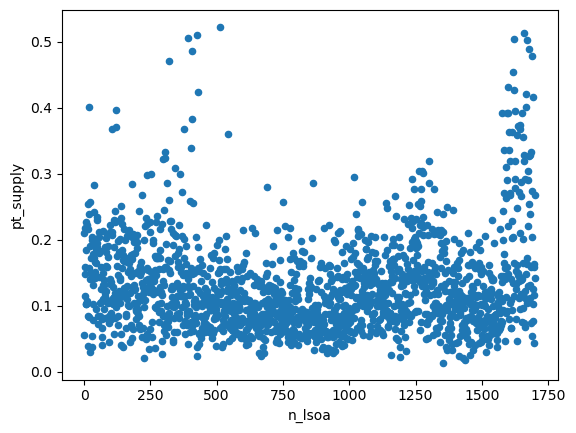

In [10]:
lsoa_supply.plot.scatter(x= "n_lsoa", y= "pt_supply")

### LSOA Demand

In [11]:
lsoa_demand

,lsoa21cd,lsoa21nm,area_sqkm,Total,women_perc,elderly_pe,children_p,pop_densit,disabled_n,deprived_p,geometry
0,E01004901,Bolton 028E,0.354363,1773,5.922166,29.606439,15.172025,5003.350923,39,28.7,"POLYGON ((366003.093 406666.688, 366004.412 40..."
1,E01005001,Bury 012B,0.238302,1228,4.885993,22.384853,19.218241,5153.129520,14,30.5,"POLYGON ((375480.348 408593.123, 375481.063 40..."
2,E01004840,Bolton 012A,4.181101,1769,4.578858,30.275798,19.106840,423.094327,56,32.9,"POLYGON ((367374.781 411954.594, 367387.095 41..."
3,E01005006,Bury 012D,1.772635,2051,6.874695,25.688674,20.234032,1157.034831,60,30.5,"POLYGON ((377212.688 410849.500, 377231.906 41..."
4,E01004773,Bolton 003D,0.266227,1985,7.103275,25.395631,19.143577,7456.052936,77,36.1,"POLYGON ((371776.559 412463.204, 371825.243 41..."
...,...,...,...,...,...,...,...,...,...,...,...
1763,E01006394,Wigan 021B,0.592787,1535,4.560261,34.043014,18.045603,2589.463159,36,33.0,"POLYGON ((355212.000 403394.000, 355230.000 40..."
1764,E01006410,Wigan 020E,0.628715,1261,4.758128,33.287718,15.543220,2005.677534,30,35.4,"POLYGON ((357596.954 403017.375, 357616.740 40..."
1765,E01006400,Wigan 021D,0.569408,1982,6.004036,18.415945,26.135217,3480.807917,15,26.5,"POLYGON ((356213.760 403792.397, 356213.312 40..."
1766,E01006331,Wigan 031D,0.596520,1501,3.997335,28.514146,16.122585,2516.260480,20,27.3,"POLYGON ((367336.970 401009.452, 367340.657 40..."


In [12]:
## Rename column to make it easier to understand
lsoa_demand = lsoa_demand.rename(columns={"women_perc" : "women_percent", "elderly_pe" : "elderly_percent", "children_p" : "child_percent", "pop_densit" : "pop_dens", "disabled_n" : "dis_no_car", "deprived_p" : "deprived_percent"})
lsoa_demand

,lsoa21cd,lsoa21nm,area_sqkm,Total,women_percent,elderly_percent,child_percent,pop_dens,dis_no_car,deprived_percent,geometry
0,E01004901,Bolton 028E,0.354363,1773,5.922166,29.606439,15.172025,5003.350923,39,28.7,"POLYGON ((366003.093 406666.688, 366004.412 40..."
1,E01005001,Bury 012B,0.238302,1228,4.885993,22.384853,19.218241,5153.129520,14,30.5,"POLYGON ((375480.348 408593.123, 375481.063 40..."
2,E01004840,Bolton 012A,4.181101,1769,4.578858,30.275798,19.106840,423.094327,56,32.9,"POLYGON ((367374.781 411954.594, 367387.095 41..."
3,E01005006,Bury 012D,1.772635,2051,6.874695,25.688674,20.234032,1157.034831,60,30.5,"POLYGON ((377212.688 410849.500, 377231.906 41..."
4,E01004773,Bolton 003D,0.266227,1985,7.103275,25.395631,19.143577,7456.052936,77,36.1,"POLYGON ((371776.559 412463.204, 371825.243 41..."
...,...,...,...,...,...,...,...,...,...,...,...
1763,E01006394,Wigan 021B,0.592787,1535,4.560261,34.043014,18.045603,2589.463159,36,33.0,"POLYGON ((355212.000 403394.000, 355230.000 40..."
1764,E01006410,Wigan 020E,0.628715,1261,4.758128,33.287718,15.543220,2005.677534,30,35.4,"POLYGON ((357596.954 403017.375, 357616.740 40..."
1765,E01006400,Wigan 021D,0.569408,1982,6.004036,18.415945,26.135217,3480.807917,15,26.5,"POLYGON ((356213.760 403792.397, 356213.312 40..."
1766,E01006331,Wigan 031D,0.596520,1501,3.997335,28.514146,16.122585,2516.260480,20,27.3,"POLYGON ((367336.970 401009.452, 367340.657 40..."


In [13]:
## Calculate normalised value of each column

lsoa_demand["women_percent_norm"] = lsoa_demand["women_percent"] / lsoa_demand["women_percent"].max()

lsoa_demand["elderly_percent_norm"] = lsoa_demand["elderly_percent"] / lsoa_demand["elderly_percent"].max()

lsoa_demand["child_percent_norm"] = lsoa_demand["child_percent"] / lsoa_demand["child_percent"].max()

lsoa_demand["pop_dens_norm"] = lsoa_demand["pop_dens"] / lsoa_demand["pop_dens"].max()

lsoa_demand["dis_no_car_norm"] = lsoa_demand["dis_no_car"] / lsoa_demand["dis_no_car"].max()

lsoa_demand["deprived_percent_norm"] = lsoa_demand["deprived_percent"] / lsoa_demand["deprived_percent"].max()

In [14]:
## Calculate demand index

n_demand = 6  ## Number of variables considered in the index
lsoa_demand["pt_demand"] = (lsoa_demand["women_percent_norm"] + lsoa_demand["elderly_percent_norm"] + lsoa_demand["child_percent_norm"] + lsoa_demand["pop_dens_norm"] + lsoa_demand["dis_no_car_norm"] + lsoa_demand["deprived_percent_norm"]) / n_demand

In [15]:
lsoa_demand

,lsoa21cd,lsoa21nm,area_sqkm,Total,women_percent,elderly_percent,child_percent,pop_dens,dis_no_car,deprived_percent,geometry,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_no_car_norm,deprived_percent_norm,pt_demand
0,E01004901,Bolton 028E,0.354363,1773,5.922166,29.606439,15.172025,5003.350923,39,28.7,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.121836,0.588550,0.268415,5.032479e-10,0.105978,0.633554,0.286389
1,E01005001,Bury 012B,0.238302,1228,4.885993,22.384853,19.218241,5153.129520,14,30.5,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.100519,0.444991,0.339998,5.183130e-10,0.038043,0.673289,0.266140
2,E01004840,Bolton 012A,4.181101,1769,4.578858,30.275798,19.106840,423.094327,56,32.9,"POLYGON ((367374.781 411954.594, 367387.095 41...",0.094200,0.601856,0.338027,4.255575e-11,0.152174,0.726269,0.318755
3,E01005006,Bury 012D,1.772635,2051,6.874695,25.688674,20.234032,1157.034831,60,30.5,"POLYGON ((377212.688 410849.500, 377231.906 41...",0.141433,0.510668,0.357969,1.163771e-10,0.163043,0.673289,0.307734
4,E01004773,Bolton 003D,0.266227,1985,7.103275,25.395631,19.143577,7456.052936,77,36.1,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.146135,0.504843,0.338677,7.499460e-10,0.209239,0.796909,0.332634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,E01006394,Wigan 021B,0.592787,1535,4.560261,34.043014,18.045603,2589.463159,36,33.0,"POLYGON ((355212.000 403394.000, 355230.000 40...",0.093818,0.676745,0.319253,2.604538e-10,0.097826,0.728477,0.319353
1764,E01006410,Wigan 020E,0.628715,1261,4.758128,33.287718,15.543220,2005.677534,30,35.4,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.097889,0.661731,0.274982,2.017354e-10,0.081522,0.781457,0.316263
1765,E01006400,Wigan 021D,0.569408,1982,6.004036,18.415945,26.135217,3480.807917,15,26.5,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.123521,0.366093,0.462369,3.501072e-10,0.040761,0.584989,0.262955
1766,E01006331,Wigan 031D,0.596520,1501,3.997335,28.514146,16.122585,2516.260480,20,27.3,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.082237,0.566836,0.285232,2.530909e-10,0.054348,0.602649,0.265217


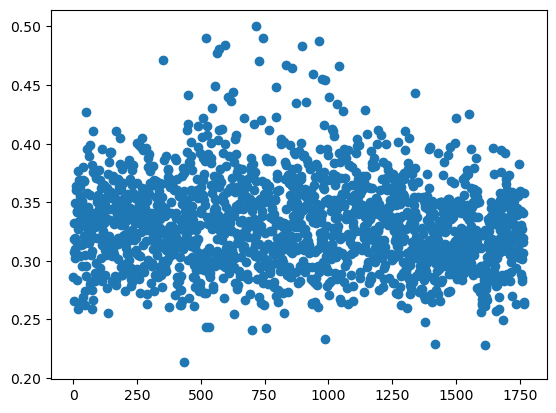

In [16]:
plt.scatter(range(len(lsoa_demand)), lsoa_demand["pt_demand"])

## Merge Supply and Demand

In [17]:
## Join supply demand dataframes
pt_supply_demand = pd.merge(lsoa_supply, lsoa_demand, on="lsoa21cd", how="left")
pt_supply_demand

,n_lsoa,lsoa21cd,lsoa21nm_x,nearest_station_distance,bus_stops_density,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,lsoa21nm_y,area_sqkm,...,dis_no_car,deprived_percent,geometry,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_no_car_norm,deprived_percent_norm,pt_demand
0,0,E01004901,Bolton 028E,583.787237,11.287876,0.081805,0.030128,0.055966,Bolton 028E,0.354363,...,39,28.7,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.121836,0.588550,0.268415,5.032479e-10,0.105978,0.633554,0.286389
1,1,E01005001,Bury 012B,2682.823140,16.785438,0.375938,0.044801,0.210370,Bury 012B,0.238302,...,14,30.5,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.100519,0.444991,0.339998,5.183130e-10,0.038043,0.673289,0.266140
2,2,E01004840,Bolton 012A,2153.166001,5.979287,0.301719,0.015959,0.158839,Bolton 012A,4.181101,...,56,32.9,"POLYGON ((367374.781 411954.594, 367387.095 41...",0.094200,0.601856,0.338027,4.255575e-11,0.152174,0.726269,0.318755
3,3,E01005006,Bury 012D,2828.181650,14.667433,0.396307,0.039148,0.217727,Bury 012D,1.772635,...,60,30.5,"POLYGON ((377212.688 410849.500, 377231.906 41...",0.141433,0.510668,0.357969,1.163771e-10,0.163043,0.673289,0.307734
4,4,E01004773,Bolton 003D,1467.288813,33.805782,0.205608,0.090228,0.147918,Bolton 003D,0.266227,...,77,36.1,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.146135,0.504843,0.338677,7.499460e-10,0.209239,0.796909,0.332634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1696,E01006394,Wigan 021B,1215.751499,23.617254,0.170361,0.063035,0.116698,Wigan 021B,0.592787,...,36,33.0,"POLYGON ((355212.000 403394.000, 355230.000 40...",0.093818,0.676745,0.319253,2.604538e-10,0.097826,0.728477,0.319353
1697,1697,E01006410,Wigan 020E,2090.861678,12.724362,0.292988,0.033962,0.163475,Wigan 020E,0.628715,...,30,35.4,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.097889,0.661731,0.274982,2.017354e-10,0.081522,0.781457,0.316263
1698,1698,E01006400,Wigan 021D,588.128763,1.756210,0.082413,0.004687,0.043550,Wigan 021D,0.569408,...,15,26.5,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.123521,0.366093,0.462369,3.501072e-10,0.040761,0.584989,0.262955
1699,1699,E01006331,Wigan 031D,3640.594673,10.058336,0.510149,0.026846,0.268497,Wigan 031D,0.596520,...,20,27.3,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.082237,0.566836,0.285232,2.530909e-10,0.054348,0.602649,0.265217


In [18]:
## Cleaning the df
pt_supply_demand = pt_supply_demand.drop(columns=["lsoa21nm_y"])
pt_supply_demand = pt_supply_demand.rename(columns={"lsoa21nm_x": "lsoa21nm"})

## Transform into gdf
pt_supply_demand = gpd.GeoDataFrame(pt_supply_demand, geometry="geometry")
pt_supply_demand

,n_lsoa,lsoa21cd,lsoa21nm,nearest_station_distance,bus_stops_density,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,area_sqkm,Total,...,dis_no_car,deprived_percent,geometry,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_no_car_norm,deprived_percent_norm,pt_demand
0,0,E01004901,Bolton 028E,583.787237,11.287876,0.081805,0.030128,0.055966,0.354363,1773,...,39,28.7,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.121836,0.588550,0.268415,5.032479e-10,0.105978,0.633554,0.286389
1,1,E01005001,Bury 012B,2682.823140,16.785438,0.375938,0.044801,0.210370,0.238302,1228,...,14,30.5,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.100519,0.444991,0.339998,5.183130e-10,0.038043,0.673289,0.266140
2,2,E01004840,Bolton 012A,2153.166001,5.979287,0.301719,0.015959,0.158839,4.181101,1769,...,56,32.9,"POLYGON ((367374.781 411954.594, 367387.095 41...",0.094200,0.601856,0.338027,4.255575e-11,0.152174,0.726269,0.318755
3,3,E01005006,Bury 012D,2828.181650,14.667433,0.396307,0.039148,0.217727,1.772635,2051,...,60,30.5,"POLYGON ((377212.688 410849.500, 377231.906 41...",0.141433,0.510668,0.357969,1.163771e-10,0.163043,0.673289,0.307734
4,4,E01004773,Bolton 003D,1467.288813,33.805782,0.205608,0.090228,0.147918,0.266227,1985,...,77,36.1,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.146135,0.504843,0.338677,7.499460e-10,0.209239,0.796909,0.332634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1696,E01006394,Wigan 021B,1215.751499,23.617254,0.170361,0.063035,0.116698,0.592787,1535,...,36,33.0,"POLYGON ((355212.000 403394.000, 355230.000 40...",0.093818,0.676745,0.319253,2.604538e-10,0.097826,0.728477,0.319353
1697,1697,E01006410,Wigan 020E,2090.861678,12.724362,0.292988,0.033962,0.163475,0.628715,1261,...,30,35.4,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.097889,0.661731,0.274982,2.017354e-10,0.081522,0.781457,0.316263
1698,1698,E01006400,Wigan 021D,588.128763,1.756210,0.082413,0.004687,0.043550,0.569408,1982,...,15,26.5,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.123521,0.366093,0.462369,3.501072e-10,0.040761,0.584989,0.262955
1699,1699,E01006331,Wigan 031D,3640.594673,10.058336,0.510149,0.026846,0.268497,0.596520,1501,...,20,27.3,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.082237,0.566836,0.285232,2.530909e-10,0.054348,0.602649,0.265217


In [19]:
pt_supply_demand.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   n_lsoa                         1701 non-null   int64   
 1   lsoa21cd                       1701 non-null   object  
 2   lsoa21nm                       1701 non-null   object  
 3   nearest_station_distance       1701 non-null   float64 
 4   bus_stops_density              1701 non-null   float64 
 5   nearest_station_distance_norm  1701 non-null   float64 
 6   bus_stops_density_norm         1701 non-null   float64 
 7   pt_supply                      1701 non-null   float64 
 8   area_sqkm                      1701 non-null   float64 
 9   Total                          1701 non-null   int64   
 10  women_percent                  1701 non-null   float64 
 11  elderly_percent                1701 non-null   float64 
 12  child_percent             

In [20]:
## Normalise pt_supply and pt_demand
pt_supply_demand["pt_supply_norm"] = pt_supply_demand["pt_supply"] / pt_supply_demand["pt_supply"].max()
pt_supply_demand["pt_demand_norm"] = pt_supply_demand["pt_demand"] / pt_supply_demand["pt_demand"].max()

pt_supply_demand

,n_lsoa,lsoa21cd,lsoa21nm,nearest_station_distance,bus_stops_density,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,area_sqkm,Total,...,geometry,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_no_car_norm,deprived_percent_norm,pt_demand,pt_supply_norm,pt_demand_norm
0,0,E01004901,Bolton 028E,583.787237,11.287876,0.081805,0.030128,0.055966,0.354363,1773,...,"POLYGON ((366003.093 406666.688, 366004.412 40...",0.121836,0.588550,0.268415,5.032479e-10,0.105978,0.633554,0.286389,0.107035,0.572774
1,1,E01005001,Bury 012B,2682.823140,16.785438,0.375938,0.044801,0.210370,0.238302,1228,...,"POLYGON ((375480.348 408593.123, 375481.063 40...",0.100519,0.444991,0.339998,5.183130e-10,0.038043,0.673289,0.266140,0.402329,0.532277
2,2,E01004840,Bolton 012A,2153.166001,5.979287,0.301719,0.015959,0.158839,4.181101,1769,...,"POLYGON ((367374.781 411954.594, 367387.095 41...",0.094200,0.601856,0.338027,4.255575e-11,0.152174,0.726269,0.318755,0.303777,0.637505
3,3,E01005006,Bury 012D,2828.181650,14.667433,0.396307,0.039148,0.217727,1.772635,2051,...,"POLYGON ((377212.688 410849.500, 377231.906 41...",0.141433,0.510668,0.357969,1.163771e-10,0.163043,0.673289,0.307734,0.416401,0.615464
4,4,E01004773,Bolton 003D,1467.288813,33.805782,0.205608,0.090228,0.147918,0.266227,1985,...,"POLYGON ((371776.559 412463.204, 371825.243 41...",0.146135,0.504843,0.338677,7.499460e-10,0.209239,0.796909,0.332634,0.282891,0.665264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1696,E01006394,Wigan 021B,1215.751499,23.617254,0.170361,0.063035,0.116698,0.592787,1535,...,"POLYGON ((355212.000 403394.000, 355230.000 40...",0.093818,0.676745,0.319253,2.604538e-10,0.097826,0.728477,0.319353,0.223183,0.638702
1697,1697,E01006410,Wigan 020E,2090.861678,12.724362,0.292988,0.033962,0.163475,0.628715,1261,...,"POLYGON ((357596.954 403017.375, 357616.740 40...",0.097889,0.661731,0.274982,2.017354e-10,0.081522,0.781457,0.316263,0.312643,0.632523
1698,1698,E01006400,Wigan 021D,588.128763,1.756210,0.082413,0.004687,0.043550,0.569408,1982,...,"POLYGON ((356213.760 403792.397, 356213.312 40...",0.123521,0.366093,0.462369,3.501072e-10,0.040761,0.584989,0.262955,0.083289,0.525908
1699,1699,E01006331,Wigan 031D,3640.594673,10.058336,0.510149,0.026846,0.268497,0.596520,1501,...,"POLYGON ((367336.970 401009.452, 367340.657 40...",0.082237,0.566836,0.285232,2.530909e-10,0.054348,0.602649,0.265217,0.513497,0.530430


In [21]:
## Create new column for calculating the difference

pt_supply_demand["demand_supply_differences"] = pt_supply_demand["pt_demand_norm"] - pt_supply_demand["pt_supply_norm"]
pt_supply_demand

,n_lsoa,lsoa21cd,lsoa21nm,nearest_station_distance,bus_stops_density,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,area_sqkm,Total,...,women_percent_norm,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_no_car_norm,deprived_percent_norm,pt_demand,pt_supply_norm,pt_demand_norm,demand_supply_differences
0,0,E01004901,Bolton 028E,583.787237,11.287876,0.081805,0.030128,0.055966,0.354363,1773,...,0.121836,0.588550,0.268415,5.032479e-10,0.105978,0.633554,0.286389,0.107035,0.572774,0.465740
1,1,E01005001,Bury 012B,2682.823140,16.785438,0.375938,0.044801,0.210370,0.238302,1228,...,0.100519,0.444991,0.339998,5.183130e-10,0.038043,0.673289,0.266140,0.402329,0.532277,0.129948
2,2,E01004840,Bolton 012A,2153.166001,5.979287,0.301719,0.015959,0.158839,4.181101,1769,...,0.094200,0.601856,0.338027,4.255575e-11,0.152174,0.726269,0.318755,0.303777,0.637505,0.333728
3,3,E01005006,Bury 012D,2828.181650,14.667433,0.396307,0.039148,0.217727,1.772635,2051,...,0.141433,0.510668,0.357969,1.163771e-10,0.163043,0.673289,0.307734,0.416401,0.615464,0.199063
4,4,E01004773,Bolton 003D,1467.288813,33.805782,0.205608,0.090228,0.147918,0.266227,1985,...,0.146135,0.504843,0.338677,7.499460e-10,0.209239,0.796909,0.332634,0.282891,0.665264,0.382372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1696,E01006394,Wigan 021B,1215.751499,23.617254,0.170361,0.063035,0.116698,0.592787,1535,...,0.093818,0.676745,0.319253,2.604538e-10,0.097826,0.728477,0.319353,0.223183,0.638702,0.415519
1697,1697,E01006410,Wigan 020E,2090.861678,12.724362,0.292988,0.033962,0.163475,0.628715,1261,...,0.097889,0.661731,0.274982,2.017354e-10,0.081522,0.781457,0.316263,0.312643,0.632523,0.319879
1698,1698,E01006400,Wigan 021D,588.128763,1.756210,0.082413,0.004687,0.043550,0.569408,1982,...,0.123521,0.366093,0.462369,3.501072e-10,0.040761,0.584989,0.262955,0.083289,0.525908,0.442618
1699,1699,E01006331,Wigan 031D,3640.594673,10.058336,0.510149,0.026846,0.268497,0.596520,1501,...,0.082237,0.566836,0.285232,2.530909e-10,0.054348,0.602649,0.265217,0.513497,0.530430,0.016933


In [22]:
## Create a column for diff_rank
## The higher the rank -> Need DRT

## Sort df by 'demand_supply_differences' in descending order
pt_supply_demand_sorted = pt_supply_demand.sort_values(by="demand_supply_differences", ascending=False)

## Create the 'rank' column
pt_supply_demand_sorted["diff_rank"] = range(1, len(pt_supply_demand_sorted) + 1)
pt_supply_demand_sorted

,n_lsoa,lsoa21cd,lsoa21nm,nearest_station_distance,bus_stops_density,nearest_station_distance_norm,bus_stops_density_norm,pt_supply,area_sqkm,Total,...,elderly_percent_norm,child_percent_norm,pop_dens_norm,dis_no_car_norm,deprived_percent_norm,pt_demand,pt_supply_norm,pt_demand_norm,demand_supply_differences,diff_rank
549,549,E01005610,Salford 034C,377.072057,29.807848,0.052838,0.079558,0.066198,0.670964,2936,...,0.851961,0.195232,4.401267e-10,0.323370,0.708609,0.477795,0.126603,0.955585,0.828982,1
839,839,E01005312,Manchester 036E,589.595817,24.555208,0.082619,0.065538,0.074079,0.122174,1921,...,0.901728,0.035917,1.581506e-09,0.358696,0.724062,0.464891,0.141674,0.929775,0.788101,2
437,437,E01005754,Stockport 004B,355.420109,24.552039,0.049804,0.065530,0.057667,0.448028,2019,...,0.369347,0.418846,4.532650e-10,0.970109,0.726269,0.441947,0.110287,0.883888,0.773601,3
710,710,E01005309,Manchester 036B,847.344095,23.788587,0.118737,0.063492,0.091114,0.210185,2166,...,0.826323,0.087395,1.036521e-09,0.399457,0.803532,0.470561,0.174255,0.941116,0.766861,4
700,700,E01005185,Manchester 032B,1205.973447,29.952506,0.168991,0.079944,0.124467,0.233703,3160,...,1.000000,0.022394,1.360013e-09,0.233696,0.743929,0.500003,0.238042,1.000000,0.761958,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,321,E01005018,Bury 001E,6021.575612,36.271823,0.843791,0.096810,0.470301,0.441114,1529,...,0.423782,0.386458,3.486405e-10,0.187500,0.598234,0.286403,0.899443,0.572802,-0.326641,1697
426,426,E01005014,Bury 001A,6675.819506,31.715376,0.935469,0.084649,0.510059,0.599079,1488,...,0.677836,0.274645,2.498275e-10,0.171196,0.704194,0.323080,0.975480,0.646155,-0.329325,1698
1659,1659,E01006303,Wigan 040B,7136.336919,9.714181,1.000000,0.025927,0.512964,2.470615,1620,...,0.613296,0.312330,6.595245e-11,0.086957,0.688742,0.306836,0.981036,0.613668,-0.367367,1699
1620,1620,E01006302,Wigan 040A,7089.707293,6.119850,0.993466,0.016334,0.504900,0.980416,1830,...,0.476264,0.345128,1.877421e-10,0.095109,0.660044,0.288239,0.965614,0.576475,-0.389139,1700


## Plot Supply and Demand

Text(0.5, 1.0, 'Demand Index')

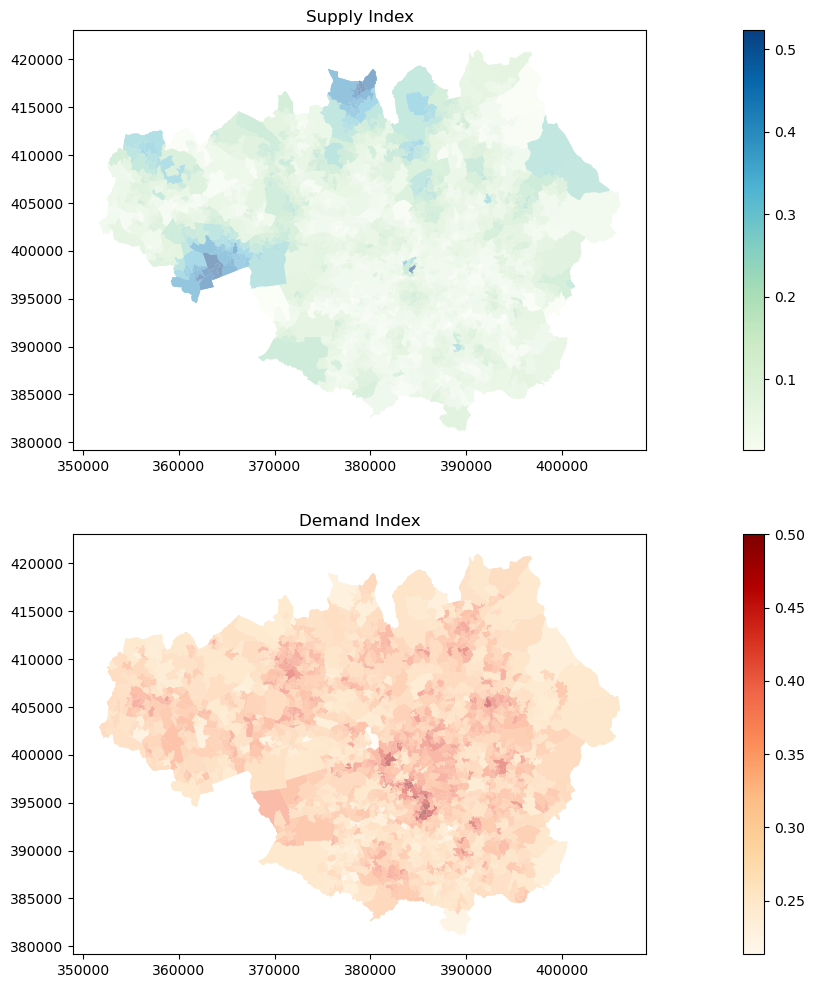

In [26]:
## Set up the plots
fig, axes = plt.subplots(2,1 , figsize=(25, 12))

## Plot Supply
pt_supply_demand_sorted.plot(ax=axes[0], column='pt_supply', legend=True, cmap='GnBu')
lsoa.plot(ax=axes[0], facecolor="white", alpha=0.5, edgecolor="none", linewidth=0.5)
axes[0].set_title('Supply Index')

## Plot Demand
pt_supply_demand_sorted.plot(ax=axes[1], column='pt_demand', legend=True, cmap='OrRd')
lsoa.plot(ax=axes[1], facecolor="white", alpha=0.5, edgecolor="none", linewidth=0.5)
axes[1].set_title('Demand Index')

## Plot Ranks

In [38]:
## Define the the number of lsoa for each percentage
top_3_percent = int((len(pt_supply_demand_sorted)) * 3/100)
top_5_percent = int((len(pt_supply_demand_sorted)) * 5/100)
top_10_percent = int((len(pt_supply_demand_sorted)) * 10/100)
top_15_percent = int((len(pt_supply_demand_sorted)) * 15/100)
top_25_percent = int((len(pt_supply_demand_sorted)) * 25/100)

## Filter the lsoa for each percentage
pt_supply_demand_3 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_3_percent]
pt_supply_demand_5 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_5_percent]
pt_supply_demand_10 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_10_percent]
pt_supply_demand_15 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_15_percent]
pt_supply_demand_25 = pt_supply_demand_sorted[pt_supply_demand_sorted["diff_rank"] <= top_25_percent]

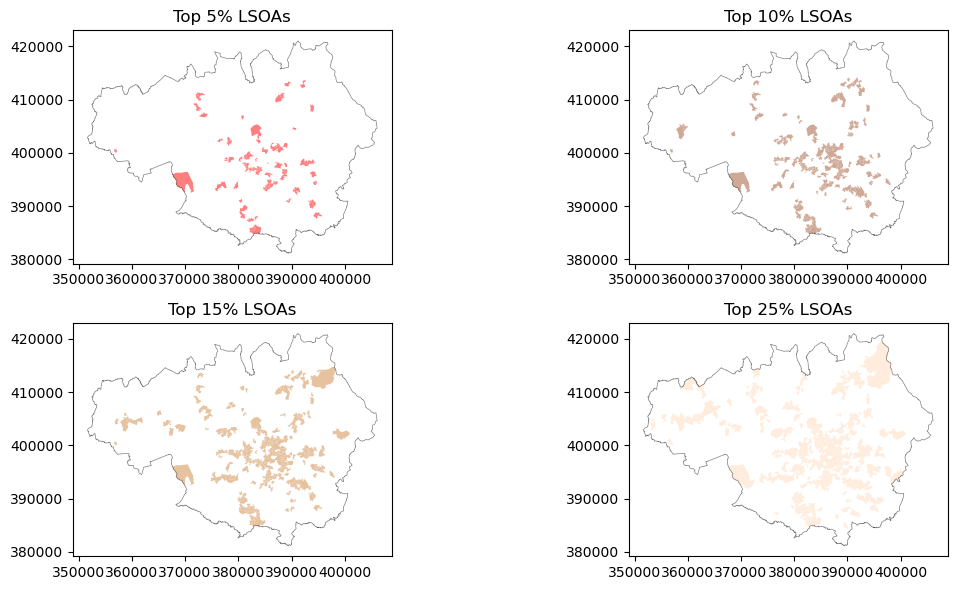

In [47]:
## Set up the plots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

## Plot top 5% LSOAs
pt_supply_demand_5.plot(ax=axes[0,0], facecolor="red", legend=False)
lsoa_outline.plot(ax=axes[0,0], facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)
axes[0,0].set_title('Top 5% LSOAs')

## Plot top 10% LSOAs
pt_supply_demand_10.plot(ax=axes[0,1], facecolor="sienna", legend=False)
lsoa_outline.plot(ax=axes[0,1], facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)
axes[0,1].set_title('Top 10% LSOAs')

## Plot top 15% LSOAs
pt_supply_demand_15.plot(ax=axes[1,0], facecolor="peru", legend=False)
lsoa_outline.plot(ax=axes[1,0], facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)
axes[1,0].set_title('Top 15% LSOAs')

## Plot top 25% LSOAs
pt_supply_demand_25.plot(ax=axes[1,1], facecolor="peachpuff", legend=False)
lsoa_outline.plot(ax=axes[1,1], facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)
axes[1,1].set_title('Top 25% LSOAs')

## Display the plots
plt.tight_layout()
plt.show()

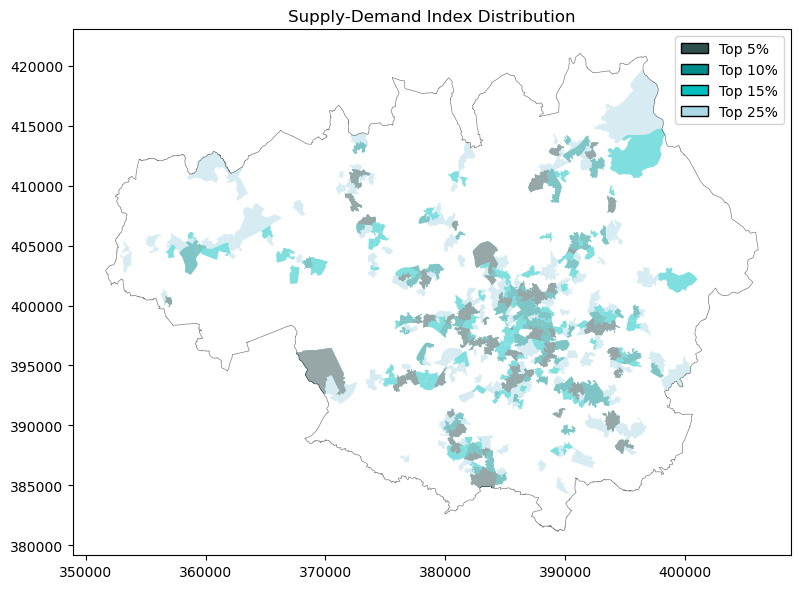

In [51]:
## Set up the plots
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

## Plot top 5% LSOAs
pt_supply_demand_25.plot(ax=ax, facecolor="lightblue", legend=False)
pt_supply_demand_15.plot(ax=ax, facecolor="c", legend=False)
pt_supply_demand_10.plot(ax=ax, facecolor="darkcyan", legend=False)
pt_supply_demand_5.plot(ax=ax, facecolor="darkslategray", legend=False)
lsoa_outline.plot(ax=ax, facecolor="w", alpha=0.5, edgecolor="black", linewidth=0.5)

## Display the plots
legend_elements = [
    Patch(facecolor='darkslategray', edgecolor='black', label='Top 5%'),
    Patch(facecolor='darkcyan', edgecolor='black', label='Top 10%'),
    Patch(facecolor='c', edgecolor='black', label='Top 15%'),
    Patch(facecolor='lightblue', edgecolor='black', label='Top 25%')
]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_title('Supply-Demand Index Distribution')
plt.tight_layout()
plt.show()

In [36]:
## Export to shapefile

pt_supply_demand_3.to_file("Data/supply_demand_percentile/pt_supply_demand_3.shp")
pt_supply_demand_5.to_file("Data/supply_demand_percentile/pt_supply_demand_5.shp")
pt_supply_demand_10.to_file("Data/supply_demand_percentile/pt_supply_demand_10.shp")
pt_supply_demand_15.to_file("Data/supply_demand_percentile/pt_supply_demand_15.shp")
pt_supply_demand_25.to_file("Data/supply_demand_percentile/pt_supply_demand_25.shp")

pt_supply_demand_sorted.to_file("Data/supply_demand_sorted/pt_supply_demand_sorted.shp")

/tmp/ipykernel_127/1332979799.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pt_supply_demand_3.to_file("Data/supply_demand_percentile/pt_supply_demand_3.shp")
/tmp/ipykernel_127/1332979799.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pt_supply_demand_5.to_file("Data/supply_demand_percentile/pt_supply_demand_5.shp")
/tmp/ipykernel_127/1332979799.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pt_supply_demand_10.to_file("Data/supply_demand_percentile/pt_supply_demand_10.shp")
/tmp/ipykernel_127/1332979799.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pt_supply_demand_15.to_file("Data/supply_demand_percentile/pt_supply_demand_15.shp")
/tmp/ipykernel_127/1332979799.py:7: UserWarning: Column names longer than 10 characters will be truncated when s